<a href="https://colab.research.google.com/github/buterajacques1/alu-machine_learning/blob/main/Jaques_BUTERA_forex_EUR_USD_price_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective
The objective is to predict EUR/USD currency pair price movements in the Forex market, the largest financial market globally. The project uses a dataset containing simulated winning transactions with classic technical indicators, aiming to serve as a foundation for applying machine learning in Forex trading.

Dataset Overview
The dataset includes 4479 simulated transactions (real data, fictitious money) from 2014 to 2017, generated using a MetaTrader script. It encompasses both buy and sell operations, using a 4-hour time frame with fixed stop loss and take profits set at 50 pips. The dataset features include RSI, momentum (MOM), Bollinger Bands (BB), exponential moving averages (EMAs), and more

import dataset

In [7]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import libriries

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.simplefilter(action='ignore')


from sklearn.metrics import classification_report
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error , r2_score






read data

In [36]:
## read data
df= pd.read_csv("/content/drive/MyDrive/FOREX EURUSD dataset/dataset01_eurusd4h.csv")

In [37]:
df.head()

,rsi1,rsi2,rsi3,rsi4,rsi5,rsi6,stoch1,stoch2,stoch3,stoch4,...,WPR6,close1,close2,close3,close4,close5,close6,hour,dayOfWeek,tipo
0,28.90,31.07,40.01,40.51,39.95,41.98,13.53,29.27,46.80,43.52,...,-56.09,1.3132,1.3132,1.3132,1.3132,1.3132,1.3132,0,1,1
1,27.39,28.90,31.07,40.01,40.51,39.95,3.93,13.53,29.27,46.80,...,-65.93,1.3125,1.3125,1.3125,1.3125,1.3125,1.3125,4,1,1
2,28.41,27.39,28.90,31.07,40.01,40.51,4.27,3.93,13.53,29.27,...,-68.07,1.3127,1.3127,1.3127,1.3127,1.3127,1.3127,8,1,1
3,34.48,28.41,27.39,28.90,31.07,40.01,12.99,4.27,3.93,13.53,...,-74.34,1.3138,1.3138,1.3138,1.3138,1.3138,1.3138,12,1,1
4,33.35,34.48,28.41,27.39,28.90,31.07,24.48,12.99,4.27,3.93,...,-92.30,1.3134,1.3134,1.3134,1.3134,1.3134,1.3134,16,1,1


In [38]:
df.describe()

,rsi1,rsi2,rsi3,rsi4,rsi5,rsi6,stoch1,stoch2,stoch3,stoch4,...,WPR6,close1,close2,close3,close4,close5,close6,hour,dayOfWeek,tipo
count,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,...,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000,4479.000000
mean,49.212367,49.218281,49.205930,49.192480,49.175113,49.173878,48.331369,48.359949,48.334941,48.322737,...,-52.205039,1.124408,1.124408,1.124408,1.124408,1.124408,1.124408,10.009377,2.993525,0.492967
std,13.057891,13.077693,13.094429,13.103938,13.109520,13.109564,24.638529,24.653636,24.645165,24.672112,...,29.304558,0.057511,0.057511,0.057511,0.057511,0.057511,0.057511,6.828558,1.413804,0.500006
min,12.200000,12.200000,12.200000,12.200000,12.200000,12.200000,2.040000,2.040000,2.040000,2.040000,...,-100.000000,1.036900,1.036900,1.036900,1.036900,1.036900,1.036900,0.000000,0.000000,0.000000
25%,40.045000,40.045000,40.035000,40.025000,40.010000,39.945000,26.775000,26.780000,26.775000,26.705000,...,-79.130000,1.087800,1.087800,1.087800,1.087800,1.087800,1.087800,4.000000,2.000000,0.000000
50%,48.700000,48.730000,48.710000,48.670000,48.700000,48.710000,48.290000,48.480000,48.380000,48.290000,...,-52.980000,1.115600,1.115600,1.115600,1.115600,1.115600,1.115600,8.000000,3.000000,0.000000
75%,58.210000,58.210000,58.215000,58.255000,58.305000,58.355000,69.750000,69.660000,69.635000,69.570000,...,-25.615000,1.135700,1.135700,1.135700,1.135700,1.135700,1.135700,16.000000,4.000000,1.000000
max,87.280000,87.280000,87.280000,87.280000,87.280000,87.280000,97.620000,97.620000,97.620000,97.620000,...,0.000000,1.314900,1.314900,1.314900,1.314900,1.314900,1.314900,23.000000,5.000000,1.000000


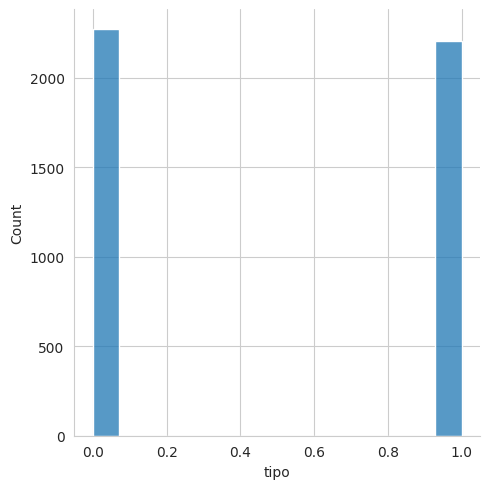

In [11]:
sns.displot(df['tipo'])

In [15]:
#check null value
df.isnull().sum()

rsi1         0
rsi2         0
rsi3         0
rsi4         0
rsi5         0
            ..
close5       0
close6       0
hour         0
dayOfWeek    0
tipo         0
Length: 99, dtype: int64

Train-test split

In [17]:

X = df.drop(columns = "tipo")
y = df["tipo"]

# Correct variable capitalization and argument name
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test sample 20%


Model 1 (without Optimization)

In [46]:
#Create Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model_1 = Sequential()
model_1.add(Dense(16, input_dim=98, activation='relu'))
model_1.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model_1.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
print(model_1.summary())


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 16)                1584      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1601 (6.25 KB)
Trainable params: 1601 (6.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [47]:
history = model_1.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/100
56/56 [==============================] - 1s 6ms/step - loss: 8.1257 - accuracy: 0.5110 - val_loss: 4.9601 - val_accuracy: 0.5134
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 3.4932 - accuracy: 0.5066 - val_loss: 2.2128 - val_accuracy: 0.5223
Epoch 3/100
56/56 [==============================] - 0s 3ms/step - loss: 2.1470 - accuracy: 0.4884 - val_loss: 1.7554 - val_accuracy: 0.5234
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 1.7603 - accuracy: 0.4934 - val_loss: 1.5779 - val_accuracy: 0.5312
Epoch 5/100
56/56 [==============================] - 0s 3ms/step - loss: 1.6299 - accuracy: 0.5018 - val_loss: 1.4474 - val_accuracy: 0.5179
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 1.3914 - accuracy: 0.5082 - val_loss: 1.3319 - val_accuracy: 0.5167
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 1.2828 - accuracy: 0.5116 - val_loss: 1.2397 - val_accuracy: 0.5279
Epoch 8/100
5

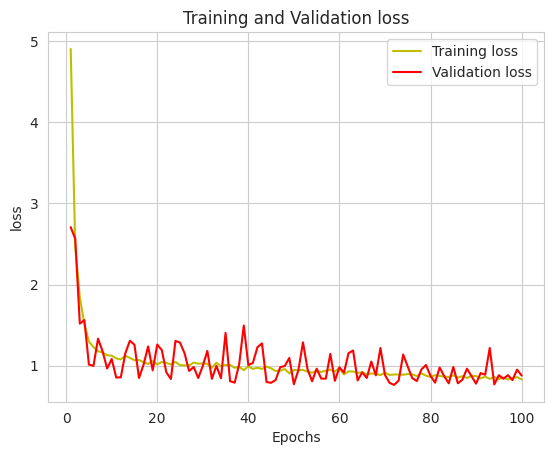

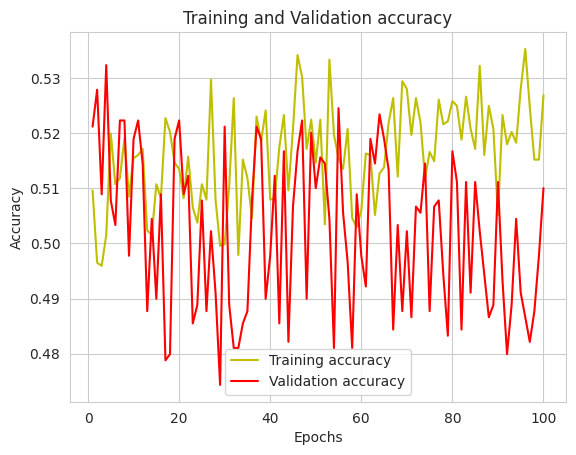

In [40]:
#Plot loss curves
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Plot loss curves for accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
#Predicting the Test set results
y_pred = model_1.predict(x_test)
y_pred = (y_pred > 0.5)

#confusion matrix
from sklearn.metrics import confusion_matrix
c = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(c)


28/28 [==============================] - 0s 1ms/step
Confusion Matrix:
[[238 219]
 [242 197]]


In [45]:
#Specificity
specificity = c[0, 0] / (c[0, 0] + c[0, 1])
print("Specificity (True Negative Rate):", specificity)

Specificity (True Negative Rate): 0.5207877461706784


In [26]:
#F1 score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)



F1 Score: 0.0718816067653277


In [27]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.51      0.96      0.67       457
     Class 1       0.50      0.04      0.07       439

    accuracy                           0.51       896
   macro avg       0.51      0.50      0.37       896
weighted avg       0.51      0.51      0.38       896



Optimized Model

In [48]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.regularizers import l1_l2

model_2 = Sequential()
model_2.add(Dense(16, input_dim=98, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_2.add(Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model_2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model_2.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Display the model's architecture
print(model_2.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                1584      
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1873 (7.32 KB)
Trainable params: 1873 (7.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


Epoch 1/100
56/56 [==============================] - 2s 11ms/step - loss: 4.9962 - accuracy: 0.4884 - val_loss: 3.8997 - val_accuracy: 0.5100
Epoch 2/100
56/56 [==============================] - 0s 6ms/step - loss: 3.2842 - accuracy: 0.5021 - val_loss: 2.7956 - val_accuracy: 0.5033
Epoch 3/100
56/56 [==============================] - 0s 6ms/step - loss: 2.5591 - accuracy: 0.4940 - val_loss: 2.3087 - val_accuracy: 0.5045
Epoch 4/100
56/56 [==============================] - 0s 5ms/step - loss: 2.1983 - accuracy: 0.4940 - val_loss: 2.0864 - val_accuracy: 0.4810
Epoch 5/100
56/56 [==============================] - 0s 5ms/step - loss: 2.0031 - accuracy: 0.5024 - val_loss: 1.9353 - val_accuracy: 0.4989
Epoch 6/100
56/56 [==============================] - 0s 5ms/step - loss: 1.8942 - accuracy: 0.5194 - val_loss: 1.8718 - val_accuracy: 0.5011
Epoch 7/100
56/56 [==============================] - 0s 5ms/step - loss: 1.8021 - accuracy: 0.5211 - val_loss: 1.7972 - val_accuracy: 0.4732
Epoch 8/100


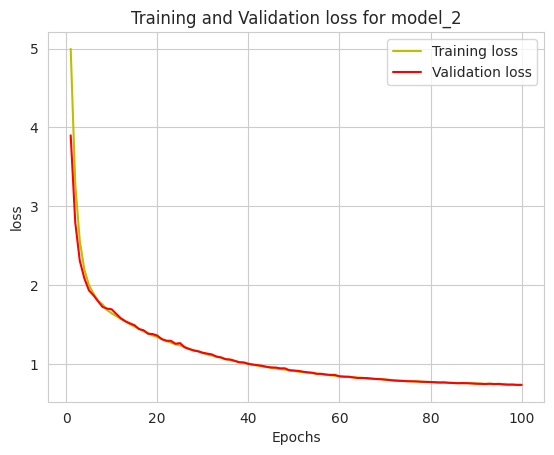

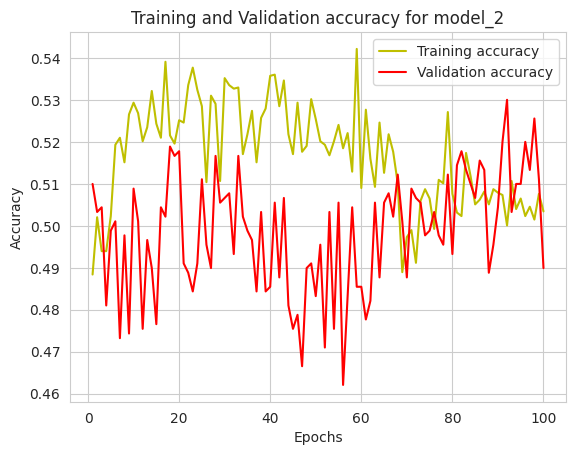

In [49]:
history_2 = model_2.fit(x_train, y_train, verbose=1, epochs=100, batch_size=64, validation_data=(x_test, y_test))

#Plot loss curves for model_2
loss_2 = history_2.history['loss']
val_loss_2 = history_2.history['val_loss']
epochs = range(1, len(loss_2) + 1)
plt.plot(epochs, loss_2, 'y', label='Training loss')
plt.plot(epochs, val_loss_2, 'r', label='Validation loss')
plt.title('Training and Validation loss for model_2')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#Plot loss curves for accuracy for model_2
accuracy_2 = history_2.history['accuracy']
val_accuracy_2 = history_2.history['val_accuracy']
plt.plot(epochs, accuracy_2, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy_2, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy for model_2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
#Predicting the Test set results for model_2
y_pred_2 = model_2.predict(x_test)
y_pred_2 = (y_pred_2 > 0.5)

#confusion matrix for model_2
c_2 = confusion_matrix(y_test, y_pred_2)
print("Confusion Matrix:")
print(c_2)

28/28 [==============================] - 0s 3ms/step
Confusion Matrix:
[[457   0]
 [439   0]]


In [31]:
#Specificity
specificity = c_2[0, 0] / (c_2[0, 0] + c_2[0, 1])
print("Specificity (True Negative Rate):", specificity)

Specificity (True Negative Rate): 1.0


In [32]:
#F1 Score
from sklearn.metrics import f1_score
f1_2 = f1_score(y_test, y_pred_2)
print("F1 Score for model 2:", f1_2)

F1 Score for model 2: 0.0


In [33]:
#Classification Report
from sklearn.metrics import classification_report
print("Classification Report for model 2:")
print(classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"]))


Classification Report for model 2:
              precision    recall  f1-score   support

     Class 0       0.51      0.96      0.67       457
     Class 1       0.50      0.04      0.07       439

    accuracy                           0.51       896
   macro avg       0.51      0.50      0.37       896
weighted avg       0.51      0.51      0.38       896



save models

In [50]:
def save_model(model, model_name, save_format='h5'):
    """
    Saves the Keras model to disk.

    Parameters:
    - model: The Keras model instance to be saved.
    - model_name: The base name of the file to which the model will be saved.
    - save_format: The format to save the model in ('h5' for HDF5, 'tf' for SavedModel). Defaults to 'h5'.
    """
    import os

    # Check if the directory exists, if not, create it
    model_dir = '/content/drive/MyDrive/saved_models'
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)

    # Construct the full path for the model file
    if save_format == 'h5':
        model_path = os.path.join(model_dir, f'{model_name}.h5')
        model.save(model_path)
        print(f'Model saved in HDF5 format at: {model_path}')
    elif save_format == 'tf':
        model_path = os.path.join(model_dir, model_name)
        model.save(model_path, save_format='tf')
        print(f'Model saved in SavedModel format at: {model_path}')
    else:
        raise ValueError("Unsupported save format. Use 'h5' or 'tf'.")


In [51]:
# Save the first model
save_model(model_1, 'model_1')

# Save the second model
save_model(model_2, 'model_2', save_format='tf')  # Example to save in TensorFlow SavedModel format


Model saved in HDF5 format at: /content/drive/MyDrive/saved_models/model_1.h5
Model saved in SavedModel format at: /content/drive/MyDrive/saved_models/model_2


In [52]:
# Evaluate Model 1
y_pred_1 = (model_1.predict(x_test) > 0.5).astype(int)
print("Model 1 Evaluation Metrics:")
print(classification_report(y_test, y_pred_1))

# Evaluate Model 2
y_pred_2 = (model_2.predict(x_test) > 0.5).astype(int)
print("Model 2 Evaluation Metrics:")
print(classification_report(y_test, y_pred_2))


28/28 [==============================] - 0s 5ms/step
Model 1 Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.49      0.39      0.44       457
           1       0.48      0.57      0.52       439

    accuracy                           0.48       896
   macro avg       0.48      0.48      0.48       896
weighted avg       0.48      0.48      0.48       896

28/28 [==============================] - 0s 3ms/step
Model 2 Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       457
           1       0.49      1.00      0.66       439

    accuracy                           0.49       896
   macro avg       0.24      0.50      0.33       896
weighted avg       0.24      0.49      0.32       896

